<a href="https://colab.research.google.com/github/JonathanRibeiro92/ReconhecimentoPadroes/blob/main/tarefa_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet para Classificacao - Diabetes
https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&id=37

Pima Indians Diabetes Database

In [ ]:
from sklearn.datasets import fetch_openml 
dataset = fetch_openml(data_id=37)

dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

X, y = dataset.data, dataset.target
X.shape, y.shape

((768, 8), (768,))

# Métricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y)

y_int = label_encoder.transform(y)

model = LogisticRegression(max_iter=1000)
model.fit(X, y_int)
ypred = model.predict(X)
print('MSE: ', mean_squared_error(y_int, ypred))
print('Intercept: ', model.intercept_)
print('Coef: ', model.coef_)



MSE:  0.21875
Intercept:  [-8.3644866]
Coef:  [[ 1.22504795e-01  3.51112854e-02 -1.32989843e-02  7.79015138e-04
  -1.17339258e-03  8.96471193e-02  8.67318608e-01  1.49732914e-02]]


# Gráficos

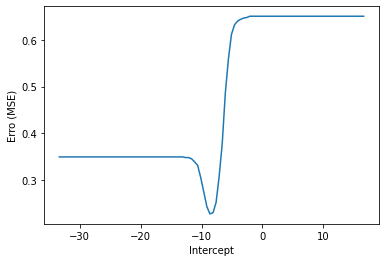

In [ ]:
import numpy 

def errorDelta(delta=100):
  _model = LogisticRegression(max_iter=1000)
  _model.fit(X,y_int)

  intercept = _model.intercept_
  intercept_values = numpy.linspace(intercept - delta, intercept + delta, max(delta, 100))
  mse_array = []

  for value in intercept_values:
      model.intercept_ = value
      ypred = model.predict(X)
      _mse = mean_squared_error(y_int, ypred)
      mse_array.append(_mse)

  return mse_array, intercept_values

from matplotlib import pyplot

pyplot.ylabel("Erro (MSE)")
pyplot.xlabel("Intercept")

errors, weights = errorDelta(25)
pyplot.plot(weights, errors)


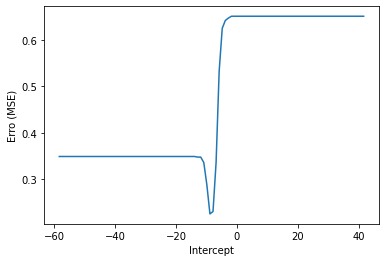

In [ ]:
pyplot.ylabel("Erro (MSE)")
pyplot.xlabel("Intercept")
errors, weights = errorDelta(50)
pyplot.plot(weights, errors)

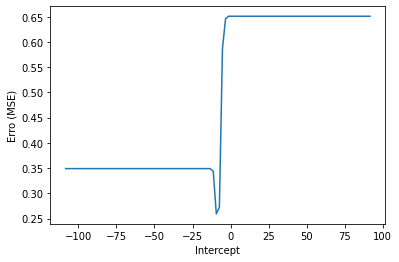

In [ ]:
pyplot.ylabel("Erro (MSE)")
pyplot.xlabel("Intercept")
errors, weights = errorDelta(100)
pyplot.plot(weights, errors)